In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

import ytree
import yt

# Loading the tree by loading the *.parameter file

In [2]:
a = ytree.load('../data/y_tree_data/ahf_halos/snap_N64L16_000.parameter',
              hubble_constant=0.7)

Additional features and improved performance (usually) by saving this arbor with "save_arbor" and reloading:
	>>> a = ytree.load("../data/y_tree_data/ahf_halos/snap_N64L16_000.parameter")
	>>> fn = a.save_arbor()
	>>> a = ytree.load(fn)


In [3]:
fn = a.save_arbor()
a = ytree.load(fn)

Getting fields [1 / ~1]: 100%|█████████████████████████████████████████████████████| 1937/1937 [00:04<00:00, 471.53it/s]
yt : [INFO     ] 2023-09-28 08:35:37,503 Saving field data to yt dataset: arbor/arbor_0000.h5.
yt : [INFO     ] 2023-09-28 08:35:37,544 Saving field data to yt dataset: arbor/arbor.h5.


In [4]:
print('box_size', a.box_size, '\n'
     'Hubble consstant', a.hubble_constant, '\n'
     'Omega matter', a.omega_matter, '\n'
     'Omega lambda', a.omega_lambda)

box_size 16.0 Mpc/h 
Hubble consstant 0.7 
Omega matter 0.3 
Omega lambda 0.7


# Trees properties

In [5]:
print('number of trees:', a.size, '\n'
     'root fields (access like a dictionary):', a['mass'], '\n'
     'units (using unty to set the units, important for comoving distance):', a['virial_radius'].to('Mpc/h'))

number of trees: 1937 
root fields (access like a dictionary): [3.30816e+13 2.87438e+13 1.44145e+13 ... 3.98067e+10 2.87493e+10
 2.21149e+10] Msun/h 
units (using unty to set the units, important for comoving distance): [0.52208 0.49818 0.3958  ... 0.08606 0.08235 0.06848] Mpc/h


# Access to individual tree
 1. A treenote is a halo in a merger tree. The number is the universal identifier, and the fields can be loaded in the same dictionary style.
 2. Array slicing is also possible, but it will return a generator, called Arbor, that can be iterated over or cast to list
 3. The Arbor (a[0] for example) dosen't store individual node, it onl generates them, you need to keep around TreeNode for object to persist, exepct when computin the number of nodes
 4. Accessing th nodes in a Tree (or Forest, not supported in AHF): A Halo is defined as a single halo at a single time in a mergere tree. 

In [6]:
print(a[0])
print(a[0], 'has mass', a[0]['mass'])

TreeNode[0]
TreeNode[0] has mass 33081600000000.0 Msun/h


In [7]:
first_three_trees = list(a[:3])
print(first_three_trees[2]['mass'].to('g/h'))

2.8662020413970003e+46 g/h


In [8]:
first_three_trees = a[:3]
first_three_trees

<generator object Arbor._yield_root_nodes at 0x7f1f5cfea570>

'''
#not gonna work
a[0].thing = 5
print(a[0].thing)
'''

In [10]:
#this will work
my_tree = a[0] #need to generate it and store it 
my_tree.thing = 5
print(my_tree.thing)

5


In [11]:
my_tree = a[0]
print(my_tree.tree_size)

new_tree = a[0] #retrive from cache
print(new_tree.tree_size)

460
460


In [12]:
#Accessing all node in a tree
print(my_tree['tree'])
#loop over nodes
for my_node in my_tree['tree']:
    print(my_node, my_node['mass'])

<generator object TreeNode._tree_nodes at 0x7f1f57006030>
TreeNode[0] 33081600000000.0 Msun/h
TreeNode[361] 32916900000000.0 Msun/h
TreeNode[725] 32626000000000.0 Msun/h
TreeNode[1093] 31075800000000.0 Msun/h
TreeNode[1467] 31069200000000.0 Msun/h
TreeNode[1843] 30819300000000.0 Msun/h
TreeNode[2229] 30278600000000.0 Msun/h
TreeNode[2615] 29548800000000.0 Msun/h
TreeNode[3002] 29050100000000.0 Msun/h
TreeNode[3387] 28628800000000.0 Msun/h
TreeNode[3775] 28186500000000.0 Msun/h
TreeNode[4178] 27735300000000.0 Msun/h
TreeNode[4578] 27609300000000.0 Msun/h
TreeNode[4987] 26408500000000.0 Msun/h
TreeNode[5392] 25987200000000.0 Msun/h
TreeNode[5794] 24731000000000.0 Msun/h
TreeNode[6208] 24307500000000.0 Msun/h
TreeNode[6623] 23957000000000.0 Msun/h
TreeNode[7041] 23614200000000.0 Msun/h
TreeNode[7460] 23107800000000.0 Msun/h
TreeNode[7878] 23033700000000.0 Msun/h
TreeNode[8298] 22597000000000.0 Msun/h
TreeNode[8724] 21636100000000.0 Msun/h
TreeNode[9155] 21232500000000.0 Msun/h
TreeNode[95

In [13]:
list(my_tree['tree'])

[TreeNode[0],
 TreeNode[361],
 TreeNode[725],
 TreeNode[1093],
 TreeNode[1467],
 TreeNode[1843],
 TreeNode[2229],
 TreeNode[2615],
 TreeNode[3002],
 TreeNode[3387],
 TreeNode[3775],
 TreeNode[4178],
 TreeNode[4578],
 TreeNode[4987],
 TreeNode[5392],
 TreeNode[5794],
 TreeNode[6208],
 TreeNode[6623],
 TreeNode[7041],
 TreeNode[7460],
 TreeNode[7878],
 TreeNode[8298],
 TreeNode[8724],
 TreeNode[9155],
 TreeNode[9590],
 TreeNode[10026],
 TreeNode[10461],
 TreeNode[10890],
 TreeNode[11320],
 TreeNode[11754],
 TreeNode[12192],
 TreeNode[12633],
 TreeNode[13074],
 TreeNode[13502],
 TreeNode[13940],
 TreeNode[14372],
 TreeNode[14804],
 TreeNode[15226],
 TreeNode[15650],
 TreeNode[16076],
 TreeNode[16504],
 TreeNode[16921],
 TreeNode[17342],
 TreeNode[17755],
 TreeNode[18165],
 TreeNode[18569],
 TreeNode[18975],
 TreeNode[19380],
 TreeNode[19776],
 TreeNode[20173],
 TreeNode[20559],
 TreeNode[20950],
 TreeNode[21338],
 TreeNode[21712],
 TreeNode[22090],
 TreeNode[22457],
 TreeNode[22816],
 Tre

In [14]:
my_tree['tree', 'virial_radius']

unyt_array([522.08, 530.2 , 537.33, 536.93, 544.89, 551.19, 555.4 ,
            557.98, 561.68, 565.51, 569.02, 571.92, 576.84, 573.88,
            576.19, 571.83, 573.2 , 575.11, 576.7 , 576.72, 580.14,
            584.06, 582.52, 585.17, 579.83, 580.62, 583.61, 590.23,
            597.79, 607.26, 598.2 , 609.35, 605.52, 604.37, 597.21,
            583.39, 567.2 , 493.64, 440.93, 378.34, 407.32, 401.99,
            391.24, 362.81, 361.65, 358.61, 356.05, 352.62, 349.74,
            347.38, 344.01, 340.05, 336.46, 328.97, 301.65, 300.09,
            297.88, 295.06, 291.88, 289.29, 288.01, 273.  , 294.71,
            291.8 , 287.87, 284.74, 283.4 , 281.03, 276.93, 270.38,
            268.06, 265.19, 261.57, 254.  , 251.43, 248.59, 245.66,
            243.32, 240.87, 237.56, 236.37, 229.9 , 226.06, 221.25,
            218.05, 214.19, 209.03, 205.38, 199.67, 193.  , 170.64,
            164.46, 152.67, 150.64, 143.92, 139.85, 134.56, 129.72,
            128.89, 128.62, 120.79, 116.84, 116.

# Accessing a Forest
A forest is a group of trees with halos that interact in a non merging way, trough process like fly-bys. A forest can contain multiple istinct trees ending in halo with no descendendent. AHF can use forest but not with distinct trees

# Accessing ancestor and descendent

In [15]:
my_ancestors = list(my_tree.ancestors)
print(my_ancestors)
print(my_ancestors[0].descendent)

[TreeNode[361]]
TreeNode[0]


# Accessing the progenitor lineage in tree

In [16]:
my_tree['mass']

unyt_quantity(3.30816e+13, 'Msun/h')

In [17]:
print(list(my_tree['prog']))

[TreeNode[0], TreeNode[361], TreeNode[725], TreeNode[1093], TreeNode[1467], TreeNode[1843], TreeNode[2229], TreeNode[2615], TreeNode[3002], TreeNode[3387], TreeNode[3775], TreeNode[4178], TreeNode[4578], TreeNode[4987], TreeNode[5392], TreeNode[5794], TreeNode[6208], TreeNode[6623], TreeNode[7041], TreeNode[7460], TreeNode[7878], TreeNode[8298], TreeNode[8724], TreeNode[9155], TreeNode[9590], TreeNode[10026], TreeNode[10461], TreeNode[10890], TreeNode[11320], TreeNode[11754], TreeNode[12192], TreeNode[12633], TreeNode[13074], TreeNode[13502], TreeNode[13940], TreeNode[14372], TreeNode[14804], TreeNode[15226], TreeNode[15650], TreeNode[16076], TreeNode[16504], TreeNode[16921], TreeNode[17342], TreeNode[17755], TreeNode[18165], TreeNode[18569], TreeNode[18975], TreeNode[19380], TreeNode[19776], TreeNode[20173], TreeNode[20559], TreeNode[20950], TreeNode[21338], TreeNode[21712], TreeNode[22090], TreeNode[22457], TreeNode[22816], TreeNode[23172], TreeNode[23524], TreeNode[23878], TreeNode[

In [18]:
print(my_tree['prog', 'mass'])

[3.30816e+13 3.29169e+13 3.26260e+13 3.10758e+13 3.10692e+13 3.08193e+13
 3.02786e+13 2.95488e+13 2.90501e+13 2.86288e+13 2.81865e+13 2.77353e+13
 2.76093e+13 2.64085e+13 2.59872e+13 2.47310e+13 2.43075e+13 2.39570e+13
 2.36142e+13 2.31078e+13 2.30337e+13 2.25970e+13 2.16361e+13 2.12325e+13
 2.00537e+13 1.95971e+13 1.94124e+13 1.96280e+13 1.99708e+13 2.05359e+13
 1.92842e+13 2.00571e+13 1.93549e+13 1.90077e+13 1.81132e+13 1.66879e+13
 1.51664e+13 9.89197e+12 6.98498e+12 5.97875e+12 5.76755e+12 5.16824e+12
 4.72926e+12 3.74404e+12 3.68212e+12 3.57487e+12 3.48198e+12 3.36477e+12
 3.26858e+12 3.17901e+12 3.08502e+12 2.95454e+12 2.84839e+12 2.66816e+12
 2.04894e+12 2.00692e+12 1.96048e+12 1.89745e+12 1.83664e+12 1.77582e+12
 1.72717e+12 1.48391e+12 1.85765e+12 1.80125e+12 1.72606e+12 1.66857e+12
 1.63760e+12 1.58232e+12 1.51487e+12 1.41314e+12 1.37112e+12 1.32579e+12
 1.27271e+12 1.15550e+12 1.12122e+12 1.08252e+12 1.03940e+12 1.01507e+12
 9.78582e+11 9.36564e+11 9.01180e+11 8.43682e+11 8.

progenitor lists and fields can be accessed fo any halo in the tree

In [19]:
tree_nodes = list(my_tree['tree'])
#pick an halo
my_halo = tree_nodes[42]
print(list(my_halo['prog']))
print(my_halo['prog', 'virial_radius'])

[TreeNode[17342], TreeNode[17755], TreeNode[18165], TreeNode[18569], TreeNode[18975], TreeNode[19380], TreeNode[19776], TreeNode[20173], TreeNode[20559], TreeNode[20950], TreeNode[21338], TreeNode[21712], TreeNode[22090], TreeNode[22457], TreeNode[22816], TreeNode[23172], TreeNode[23524], TreeNode[23878], TreeNode[24218], TreeNode[24564], TreeNode[24895], TreeNode[25209], TreeNode[25522], TreeNode[25818], TreeNode[26108], TreeNode[26372], TreeNode[26627], TreeNode[26873], TreeNode[27090], TreeNode[27306], TreeNode[27504], TreeNode[27693], TreeNode[27863], TreeNode[28026], TreeNode[28173], TreeNode[28309], TreeNode[28436], TreeNode[28557], TreeNode[28668], TreeNode[28773], TreeNode[28868], TreeNode[28951], TreeNode[29026], TreeNode[29094], TreeNode[29157], TreeNode[29209], TreeNode[29253], TreeNode[29294], TreeNode[29331], TreeNode[29366], TreeNode[29398], TreeNode[29426], TreeNode[29452], TreeNode[29475], TreeNode[29498], TreeNode[29516], TreeNode[29534], TreeNode[29549], TreeNode[2956

# customize the progenitor line
The progenitor line is defined by the default as the line of the most massive ancestor, but this can be canged

In [20]:
print(list(my_tree['prog']))

[TreeNode[0], TreeNode[361], TreeNode[725], TreeNode[1093], TreeNode[1467], TreeNode[1843], TreeNode[2229], TreeNode[2615], TreeNode[3002], TreeNode[3387], TreeNode[3775], TreeNode[4178], TreeNode[4578], TreeNode[4987], TreeNode[5392], TreeNode[5794], TreeNode[6208], TreeNode[6623], TreeNode[7041], TreeNode[7460], TreeNode[7878], TreeNode[8298], TreeNode[8724], TreeNode[9155], TreeNode[9590], TreeNode[10026], TreeNode[10461], TreeNode[10890], TreeNode[11320], TreeNode[11754], TreeNode[12192], TreeNode[12633], TreeNode[13074], TreeNode[13502], TreeNode[13940], TreeNode[14372], TreeNode[14804], TreeNode[15226], TreeNode[15650], TreeNode[16076], TreeNode[16504], TreeNode[16921], TreeNode[17342], TreeNode[17755], TreeNode[18165], TreeNode[18569], TreeNode[18975], TreeNode[19380], TreeNode[19776], TreeNode[20173], TreeNode[20559], TreeNode[20950], TreeNode[21338], TreeNode[21712], TreeNode[22090], TreeNode[22457], TreeNode[22816], TreeNode[23172], TreeNode[23524], TreeNode[23878], TreeNode[

In [21]:
a.set_selector('min_field_value', 'virial_radius')
print(list(my_tree['prog']))

[TreeNode[0], TreeNode[361], TreeNode[725], TreeNode[1093], TreeNode[1467], TreeNode[1843], TreeNode[2229], TreeNode[2615], TreeNode[3002], TreeNode[3387], TreeNode[3775], TreeNode[4178], TreeNode[4578], TreeNode[4987], TreeNode[5392], TreeNode[5794], TreeNode[6208], TreeNode[6623], TreeNode[7041], TreeNode[7460], TreeNode[7878], TreeNode[8298], TreeNode[8724], TreeNode[9155], TreeNode[9590], TreeNode[10130], TreeNode[10563], TreeNode[10991], TreeNode[11421], TreeNode[11851], TreeNode[12288], TreeNode[12641], TreeNode[13082], TreeNode[13511], TreeNode[13948], TreeNode[14378], TreeNode[15219]]


In [22]:
a.set_selector('min_field_value', 'mass')

# Accessing the leaf of a Tree
the leaf of a tree are the nodes with no ancestors/ THere are the very first halos to form. This can be useful for semi-anallytical models or any framework where you want to start at the origins of a halo and work forward in time. 

In [23]:
my_tree = a[0]
my_leaves = my_tree.get_leaf_nodes(selector='forest')
for my_leaf in my_leaves:
    print(my_leaf)

TreeNode[29681]
TreeNode[28662]
TreeNode[26592]
TreeNode[26832]
TreeNode[24077]
TreeNode[20203]
TreeNode[27717]
TreeNode[26796]
TreeNode[13507]
TreeNode[25213]
TreeNode[26616]
TreeNode[24635]
TreeNode[19724]
TreeNode[12639]
TreeNode[22313]
TreeNode[14723]
TreeNode[12379]
TreeNode[29449]
TreeNode[28354]
TreeNode[28289]
TreeNode[27583]
TreeNode[24182]
TreeNode[25517]
TreeNode[22779]
TreeNode[21228]
TreeNode[15219]
TreeNode[17314]


# Accessing the root nodes of a forest
A forset can have multiple root node, nodes that have no descendent 

In [24]:
my_tree = a[0]
my_roots = my_tree.get_root_nodes()
for my_root in my_roots:
    print(my_root)

TreeNode[0]


# Searching trough merger trees (accesing like a database)
There are a couple of different ways to search through a merger tree dataset to find halos meeting various criteria, similar to the type of selectino done with a relational databse. 

In [25]:
halos = list(a.select_halos("tree['forest', 'mass'].to('Msun') > 5e11"))

Selecting halos (found 5569): 100%|███████████████████████████████████████████████| 1937/1937 [00:01<00:00, 1622.38it/s]


# Creating the Selection
it is also possible to use the get_yt_selection to access more functionality thant select_halos

In [27]:
#dosen't work on AHF
# a = ytree.load('../data/y_tree_data/ahf_halos/snap_N64L16_000.parameter')
# selection = a.get_yt_selection(above=[('mass', 1e13, 'Msun'), ('redshift', 0.5)])

# Fields in ytree

In [28]:
a = ytree.load('../data/y_tree_data/ahf_halos/snap_N64L16_000.parameter')
print(a.field_info['Rvir'])

{'column': 11, 'file': 'halos', 'units': 'kpc/h', 'aliases': ['virial_radius']}


# Vector fields
Same query return array (X,Y,Z), like position


In [29]:
a['position']

Reading root fields: 100%|███████████████████████████████████████████████████████| 1937/1937 [00:00<00:00, 20448.28it/s]


unyt_array([[ 1074.68406434, 14706.65958243,  2873.57221797],
            [10412.59981308,  1954.11803099,  4829.66218015],
            [10712.35860545,  8667.63439357,  2081.02718618],
            ...,
            [ 9461.45966649,  1616.47865176,  5654.02594209],
            [ 9346.53718655,   791.31326538,  5789.57480651],
            [ 9353.52271398,   782.33807782,  5806.84054693]], 'kpc/h')

# Analysis Tree
fields containig information from all sorts of complicated analysis for any halo in the harbor 

# Plot merger tree

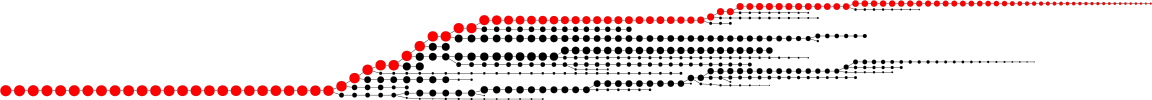

In [30]:
p = ytree.TreePlot(a[0], dot_kwargs={'rankdir': 'LR', 'size': '"12,4"'})
p.save('tree_0.png')

#display the image
im = Image.open('tree_0.png')
display(im)

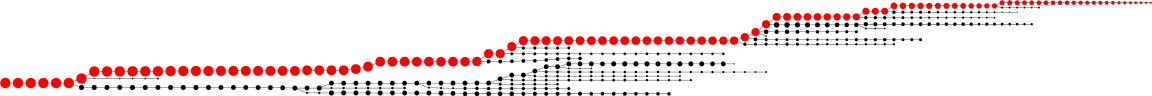

In [31]:
p = ytree.TreePlot(a[1], dot_kwargs={'rankdir': 'LR', 'size': '"12,4"'})
p.save('tree_1.png')

#display the image
im = Image.open('tree_1.png')
display(im)

# Analyzing Merger Tree (pipelines)
it is going to take the following form

```
for tree in trees:
    for node in tree["forest"]:
        ap.process_target(node)
```

it dosen't have any other input except the final directory

we can use the fanction ```add_operation(func)``` to ad the funciton func to the analysis pipeline. In order to continue the analysis even when the functions return ```True/False``` it is possible to use the ```always_do=True``` like: ```ap.add_operation(func,..., always_do=True)```

### Modifing a node
There may be occasions where you want to pass local variables or objects around from one function to the next. The easiest way to do this is by attaching them to the TreeNode object itself as an attribute.

### Creating a Analysis Recipe
Using the .add_operation dosen't result in fewer lines of code, but we can reuse them in later pipelines. It is also possible to define a ```recipe```, which can take as input a AnalysisPipeline or more, adding more structure, as follow:

### Parallel analysis
We can run pipeline in parallel using parallel iterator: